## CIFAR-10: CNN from scratch VS Using VGG16

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

val_split = 0.15
split_idx = int(len(x_train) * (1 - val_split))
x_val = x_train[split_idx:]
y_val = y_train[split_idx:]
x_train = x_train[:split_idx]
y_train = y_train[:split_idx]

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.15,
    fill_mode='reflect',
    shear_range=0.1
)
train_datagen.fit(x_train)

deeper_cnn = models.Sequential([
    layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3),
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3,3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3,3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Conv2D(512, (3,3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Conv2D(512, (3,3), padding='same', activation='relu',
                  kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),

    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(10, activation='softmax')
])

deeper_cnn.compile(
    optimizer=optimizers.Adam(learning_rate=0.0008, amsgrad=True),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


callbacks_cnn = [
    EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7),
    ModelCheckpoint('best_deeper_cnn.keras', monitor='val_accuracy', save_best_only=True)
]


print("Training Deeper CNN...")
history_cnn = deeper_cnn.fit(
    train_datagen.flow(x_train, y_train, batch_size=256),
    steps_per_epoch=len(x_train)//256,
    epochs=150,
    validation_data=(x_val, y_val),
    callbacks=callbacks_cnn,
    verbose=1
)




170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Deeper CNN...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 72s 258ms/step - accuracy: 0.2627 - loss: 2.8988 - val_accuracy: 0.0972 - val_loss: 4.9661 - learning_rate: 8.0000e-04
Epoch 2/150
  1/166 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.3906 - loss: 2.2258

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3906 - loss: 2.2258 - val_accuracy: 0.0972 - val_loss: 5.1577 - learning_rate: 8.0000e-04
Epoch 3/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 30s 179ms/step - accuracy: 0.4293 - loss: 1.9963 - val_accuracy: 0.1976 - val_loss: 4.3429 - learning_rate: 8.0000e-04
Epoch 4/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5156 - loss: 1.6756 - val_accuracy: 0.2027 - val_loss: 4.3431 - learning_rate: 8.0000e-04
Epoch 5/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 38s 172ms/step - accuracy: 0.5114 - loss: 1.7353 - val_accuracy: 0.2269 - val_loss: 3.8487 - learning_rate: 8.0000e-04
Epoch 6/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3867 - loss: 2.0073 - val_accuracy: 0.2287 - val_loss: 3.6206 - learning_rate: 8.0000e-04
Epoch 7/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 40s 184ms/step - accuracy: 0.4596 - loss: 1.9027 - val_accuracy: 0.4888 - val_loss: 1.8610 - learning_rate: 8.0000e-04
Epoch 8/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc

In [3]:
base_model = applications.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(32,32,3)
)

for layer in base_model.layers[:10]:
    layer.trainable = False
for layer in base_model.layers[10:]:
    layer.trainable = True
    if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer = regularizers.l2(1e-5)

optimized_vgg = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.7),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(10, activation='softmax')
])

optimized_vgg.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001, amsgrad=True),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_vgg = [
    EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7),
    ModelCheckpoint('best_optimized_vgg.keras', monitor='val_accuracy', save_best_only=True)
]

print("\nTraining Optimized VGG16...")
history_vgg = optimized_vgg.fit(
    train_datagen.flow(x_train, y_train, batch_size=128),
    steps_per_epoch=len(x_train)//128,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=callbacks_vgg,
    verbose=1
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Optimized VGG16...
Epoch 1/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 52s 121ms/step - accuracy: 0.2650 - loss: 2.8708 - val_accuracy: 0.5880 - val_loss: 1.3603 - learning_rate: 1.0000e-04
Epoch 2/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4688 - loss: 1.5996 - val_accuracy: 0.5883 - val_loss: 1.3571 - learning_rate: 1.0000e-04
Epoch 3/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 64s 101ms/step - accuracy: 0.5167 - loss: 1.6545 - val_accuracy: 0.6637 - val_loss: 1.1739 - learning_rate: 1.0000e-04
Epoch 4/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6250 - loss: 1.2586 - val_accuracy: 0.6556 - val_loss: 1.2178 - learning_rate: 1.0000e-04
Epoch 5/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.6055 - loss: 1.3442 - val_accuracy: 0.6817 - val_loss: 1.0704 - learning_rate: 1.0000e-04
Epoch 6/100
332/332 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6719 - loss: 1.2001 - val_accuracy: 0.6820 - val_loss: 1.


Deeper CNN Performance:
Train Accuracy: 84.06%
Validation Accuracy: 81.71%
Test Accuracy: 80.66%


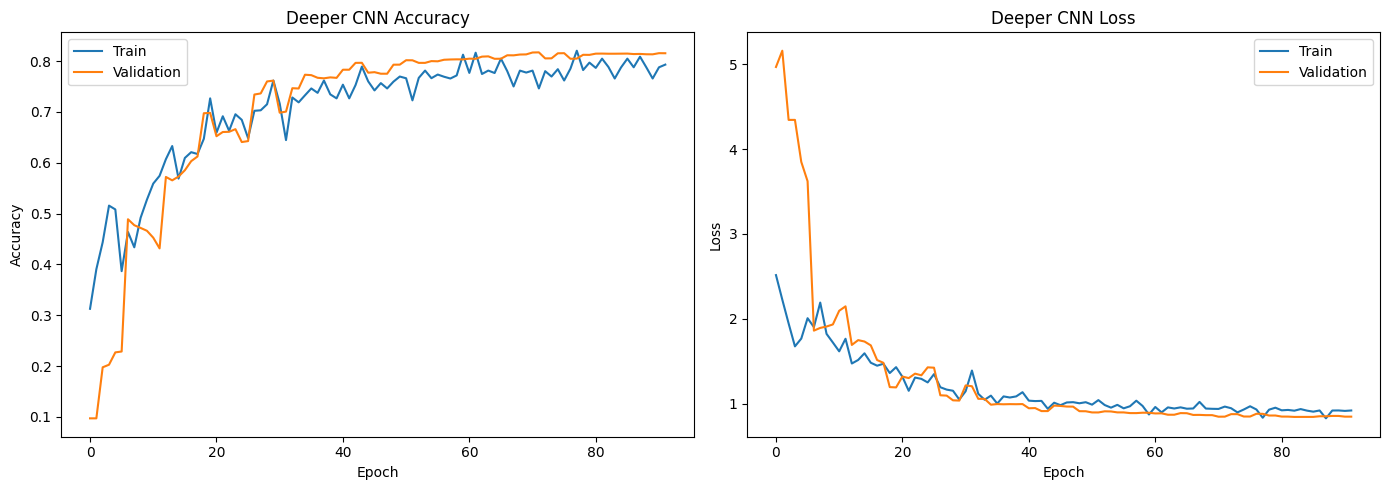


Optimized VGG16 Performance:
Train Accuracy: 92.18%
Validation Accuracy: 84.05%
Test Accuracy: 83.13%


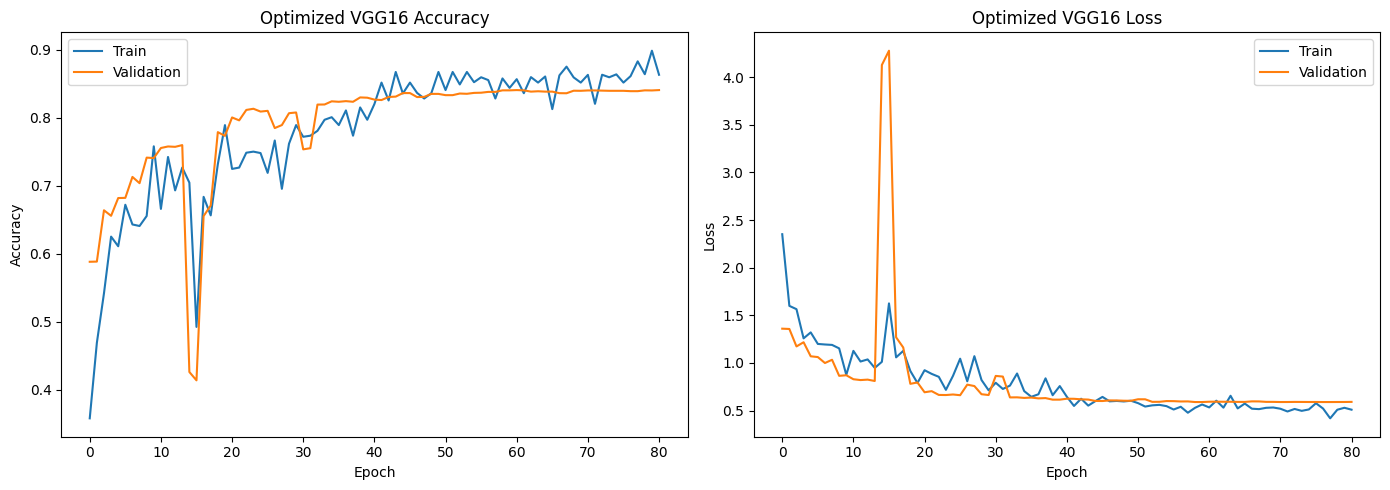

In [4]:
def evaluate_and_plot(model, history, name):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
    val_acc = max(history.history['val_accuracy'])

    print(f"\n{name} Performance:")
    print(f"Train Accuracy: {train_acc*100:.2f}%")
    print(f"Validation Accuracy: {val_acc*100:.2f}%")
    print(f"Test Accuracy: {test_acc*100:.2f}%")

    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

evaluate_and_plot(deeper_cnn, history_cnn, "Deeper CNN")
evaluate_and_plot(optimized_vgg, history_vgg, "Optimized VGG16")


deeper_cnn.save('cifar10_deeper_cnn.keras')
optimized_vgg.save('cifar10_optimized_vgg.keras')


#  Model Comparison Report: Deeper CNN vs. Optimized VGG16 on CIFAR-10

## Dataset & Preprocessing

- **Dataset**: CIFAR-10 (50,000 training + 10,000 test images).
- **Input Shape**: (32, 32, 3)
- **Label Format**: Integer labels (flattened from shape (N, 1) to (N,))
- **Data Normalization**: All pixel values scaled to `[0, 1]` by dividing by 255.
- **Train/Validation Split**: 85% for training, 15% for validation from the original training data.
- **Data Augmentation**:
  - Rotation: ±20°
  - Width/Height shift: ±15%
  - Zoom: up to ±15%
  - Shear transformation
  - Horizontal flip
  - Fill mode: reflect

##  Model Architectures

### 1️⃣ Deeper CNN (Custom Model)
- 5 convolutional blocks with increasing depth (64 → 512 filters)
- Each block includes:
  - `Conv2D` layers with `ReLU` activation
  - `BatchNormalization`
  - `MaxPooling2D` (except last block)
  - `Dropout` (0.2 to 0.6 increasing across layers)
- Final Layers:
  - `GlobalAveragePooling2D`
  - Dense layer with 1024 units + Dropout
  - Output layer with 10 softmax neurons

**Regularization**:
- L2 regularization (`1e-4`) applied to all Conv2D and Dense layers

### 2️⃣ Optimized VGG16 (Transfer Learning)
- Base: `VGG16` without top layers, with `imagenet` weights
- Layers 0–9 frozen (non-trainable), layers 10 onward trainable
- Regularization added (`L2 = 1e-5`) to trainable layers
- Custom Top Layers:
  - `GlobalAveragePooling2D`
  - Dense(1024) + BatchNorm + Dropout(0.7)
  - Dense(512) + BatchNorm + Dropout(0.6)
  - Output: Dense(10) with softmax


##  Training Configuration

| Setting                 | Deeper CNN              | Optimized VGG16           |
|-------------------------|--------------------------|----------------------------|
| **Epochs**              | 150                      | 100                        |
| **Batch Size**          | 256                      | 128                        |
| **Optimizer**           | Adam (lr=0.0008)         | Adam (lr=0.0001)           |
| **Loss Function**       | Sparse Categorical CE    | Sparse Categorical CE      |
| **Learning Rate Decay** | ReduceLROnPlateau        | ReduceLROnPlateau          |
| **Early Stopping**      | Yes (patience = 20)      | Yes (patience = 20)        |
| **Checkpoint Saving**   | Best model by val_acc    | Best model by val_acc      |


##  Performance Summary

| Metric               | Deeper CNN       | Optimized VGG16    |
|----------------------|------------------|---------------------|
| **Train Accuracy**   | 84.06%           | **92.18%**          |
| **Validation Accuracy** | 81.71%       | **84.05%**          |
| **Test Accuracy**    | 80.66%           | **83.13%**          |



##  Key Insights

- **Optimized VGG16** outperformed the Deeper CNN in all metrics. The use of pre-trained weights provided a strong feature extraction base, improving convergence and generalization.
- The **Deeper CNN**, despite being trained from scratch, still achieved strong performance and proved that a carefully designed architecture with proper regularization and augmentation can compete with transfer learning.
- **Train Accuracy Gap**: The Deeper CNN achieved a lower training accuracy, indicating it might have a higher bias than the VGG16-based model.
- **Validation and Test Performance**: Both models generalized well, but Optimized VGG16 showed stronger robustness on unseen data.


##  Conclusion

In this experiment on the CIFAR-10 dataset:
- **Optimized VGG16** is the superior model in terms of accuracy and generalization.
- **Deeper CNN** is a competitive scratch-built model that demonstrates good training and validation behavior but slightly lags in final test accuracy.
- For production or high-accuracy applications, **transfer learning with fine-tuning (like VGG16)** is highly effective and preferable.

